In [ ]:
import pandas as pd  

sales_df = pd.read_csv('.\\retail_sales_dataset.csv')

In [2]:
print(sales_df.head())
print('Sales DataFrame shape:', sales_df.shape)

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Sales DataFrame shape: (1000, 9)


In [3]:
print(sales_df.info())
print(sales_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [4]:
# # just for precaution 
# sales_df.dropna(inplace=True)
sales_df.dropna(subset=['Date'], inplace=True)
print(sales_df.columns)
print(sales_df['Date'].isnull().sum())


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
0


In [5]:
# converting sales data into date as it is availavle in object type 
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
print(sales_df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [6]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [7]:
mode_values = sales_df.mode().iloc[0]
print('Mode Values:\n', mode_values)

Mode Values:
 Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object


In [8]:
numerical_cols = sales_df.select_dtypes(include=['float64', 'int64']).columns.drop(['Transaction ID'])
# numerical_cols = sales_df.select_dtypes(include=['number']).columns
# cols = numerical_cols.drop(['Transaction ID']) 
print(sales_df[numerical_cols].describe())

              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000


In [9]:
non_numeric_cols = sales_df.select_dtypes(include=['object','datetime64[ns]']).columns
print(sales_df[non_numeric_cols].describe())

                                Date
count                           1000
mean   2023-07-03 00:25:55.200000256
min              2023-01-01 00:00:00
25%              2023-04-08 00:00:00
50%              2023-06-29 12:00:00
75%              2023-10-04 00:00:00
max              2024-01-01 00:00:00


In [10]:
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns            # For advanced visualizations

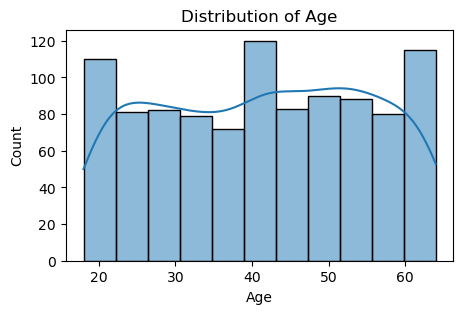

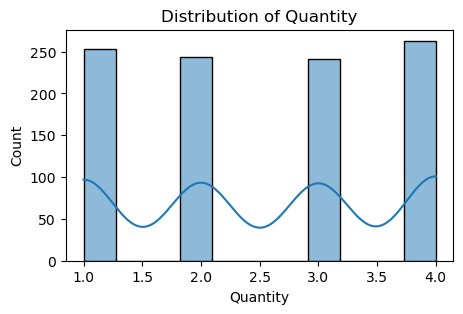

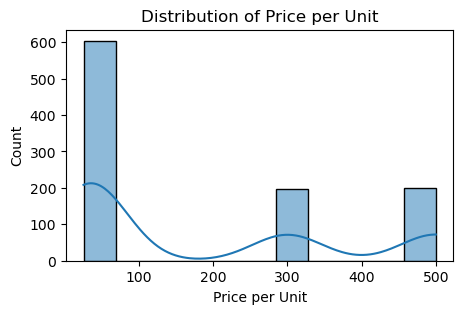

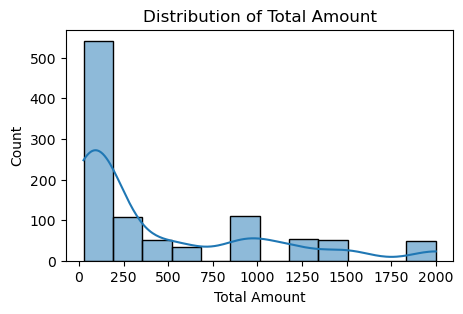

In [11]:
# Plot histograms to see data distribution.
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(sales_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [12]:
# Set the 'Date' column as the index for time series analysis.
print(sales_df.columns)
sales_df.set_index('Date', inplace=True)

print(sales_df.columns)  # 'Date' will not be listed here
print(sales_df.index)    # 'Date' will appear here


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
DatetimeIndex(['2023-11-24', '2023-02-27', '2023-01-13', '2023-05-21',
               '2023-05-06', '2023-04-25', '2023-03-13', '2023-02-22',
               '2023-12-13', '2023-10-07',
               ...
               '2023-12-26', '2023-08-21', '2023-02-06', '2023-12-18',
               '2023-04-30', '2023-05-16', '2023-11-17', '2023-10-29',
               '2023-12-05', '2023-04-12'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)


In [14]:
# # Aggregate sales data weekly and monthly.
weekly_sales = sales_df['Total Amount'].resample('W').sum()
monthly_sales = sales_df['Total Amount'].resample('ME').sum()

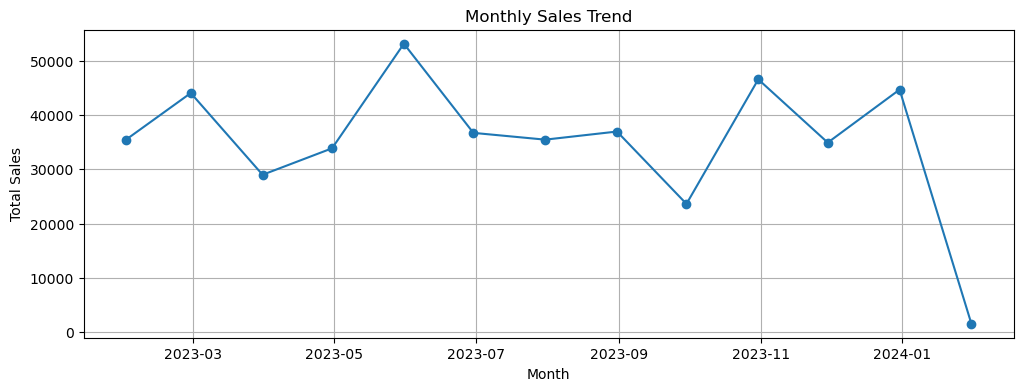

In [16]:
# Plot Time Series Data
plt.figure(figsize=(12,4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Text(2023-05-21 00:00:00, 19266.5, 'Max Sales: 17515')

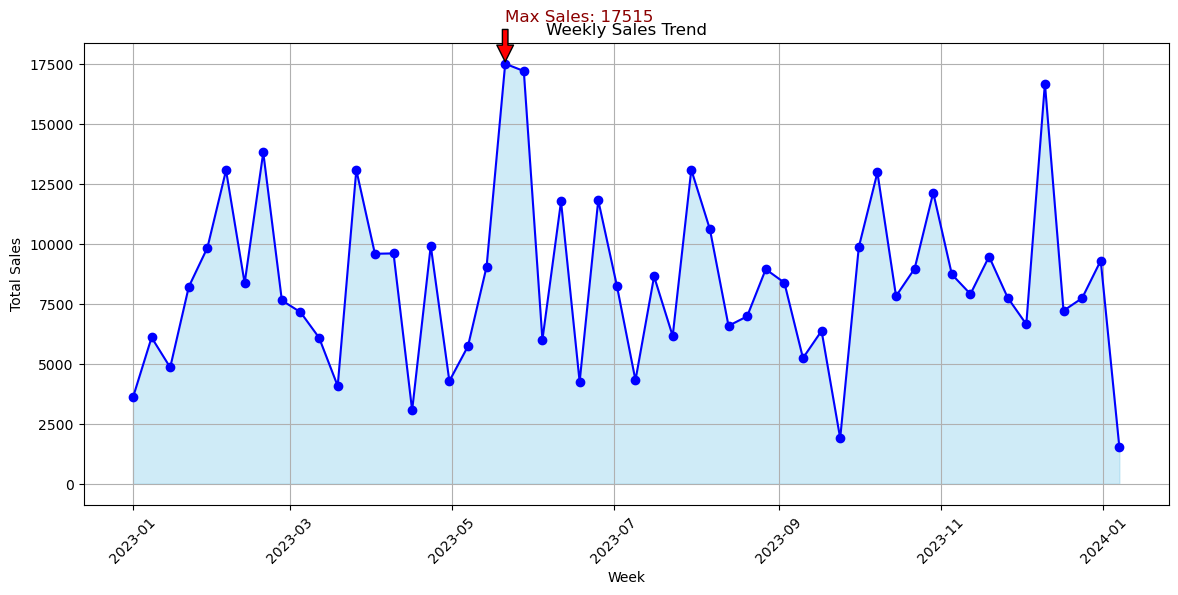

In [18]:
# Plot the Weekly Sales Data
plt.figure(figsize=(14,6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)

# Adding details to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.fill_between(weekly_sales.index, weekly_sales.values, color='skyblue', alpha=0.4)  # Add shading under the line

# Highlight maximum sales point
max_sales = weekly_sales.max()
max_sales_week = weekly_sales.idxmax()
plt.annotate(f'Max Sales: {max_sales}', xy=(max_sales_week, max_sales), xytext=(max_sales_week, max_sales * 1.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='darkred')


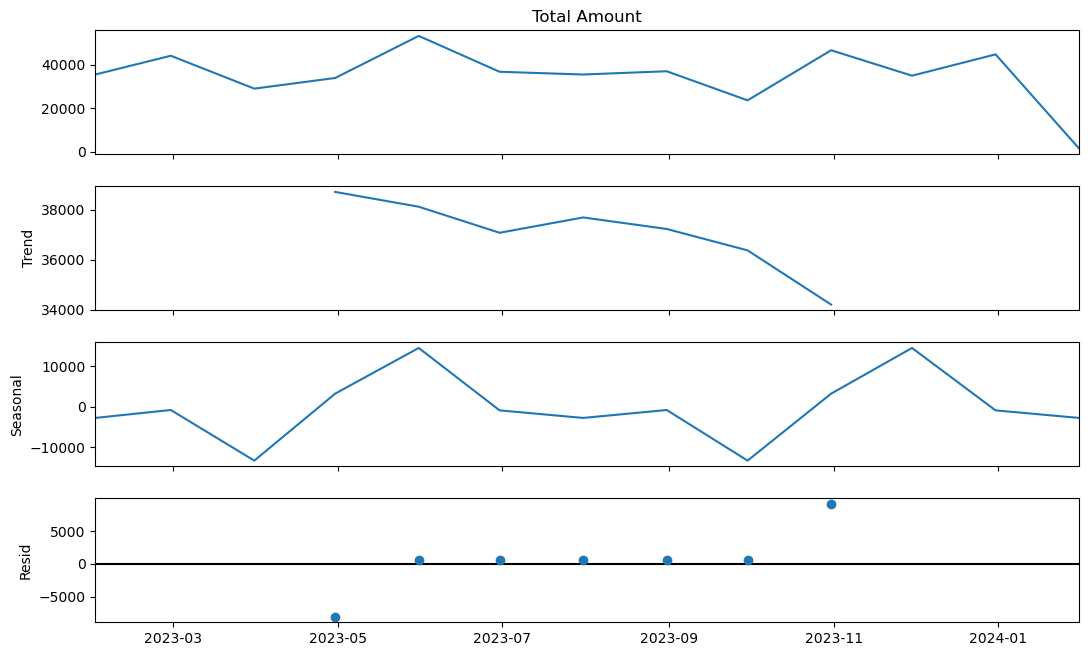

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales, model='additive', period=6)
fig = decomposition.plot()
fig.set_size_inches(12, 7)
plt.show()

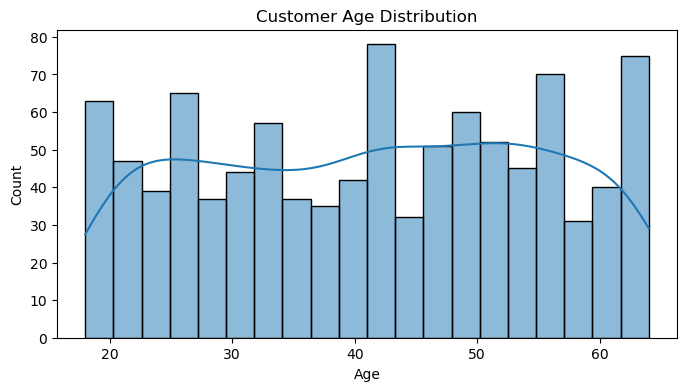

In [24]:
# ### Customer and Product Analysis

# Customer Demographics (Assuming columns like 'Customer_Age' and 'Customer_Gender')
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(sales_df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

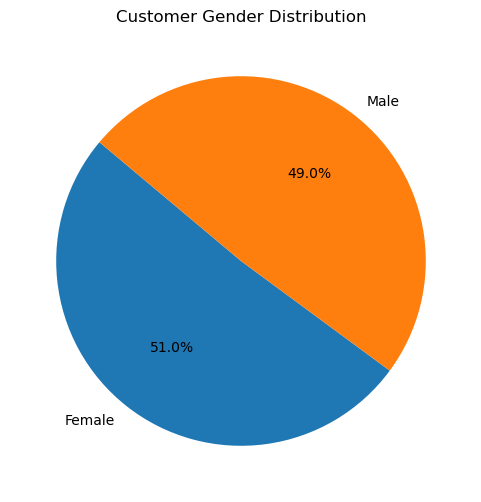

In [25]:
# Gender distribution
gender_counts = sales_df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Gender Distribution')
plt.show()

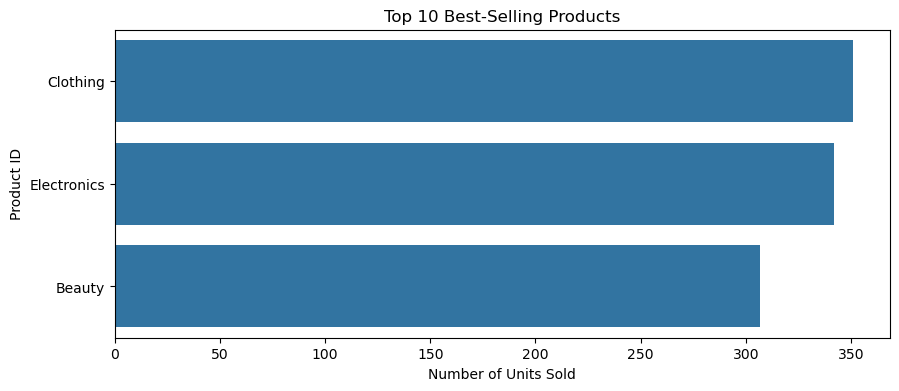

In [29]:
# Purchasing Behavior
# Top-selling products
top_products = sales_df['Product Category'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Number of Units Sold')
plt.ylabel('Product ID')
plt.show()

In [35]:
customer_metrics = sales_df.groupby('Customer ID').agg({
    'Total Amount': ['sum', 'count']})
customer_metrics.columns = ['Total_Spent', 'Purchase_Count']
customer_metrics['Average_Spent'] = customer_metrics['Total_Spent'] / customer_metrics['Purchase_Count']
print(customer_metrics.head())

             Total_Spent  Purchase_Count  Average_Spent
Customer ID                                            
CUST001              150               1          150.0
CUST002             1000               1         1000.0
CUST003               30               1           30.0
CUST004              500               1          500.0
CUST005              100               1          100.0


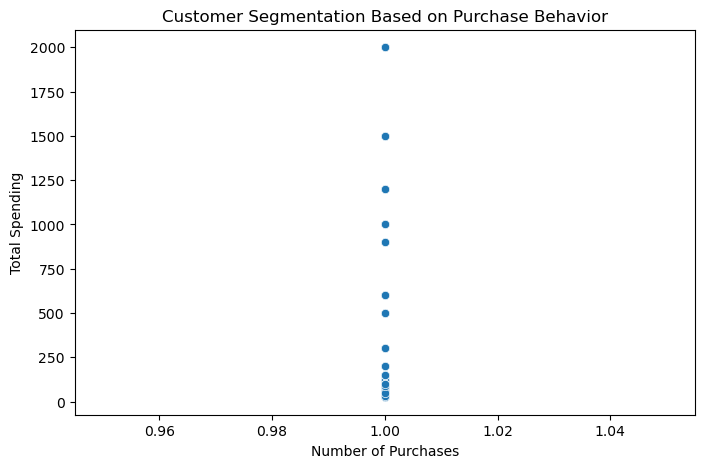

In [37]:
# Visualize Customer Segments
plt.figure(figsize=(8,5))
sns.scatterplot(data=customer_metrics, x='Purchase_Count', y='Total_Spent')
plt.title('Customer Segmentation Based on Purchase Behavior')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spending')
plt.show()

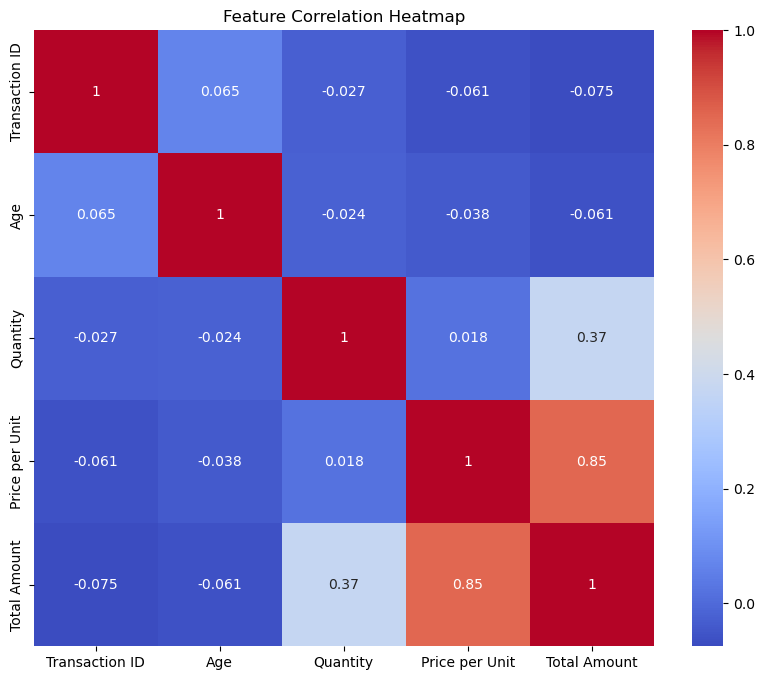

In [43]:
# ### Visualization

# Select only numeric columns for correlation analysis
numeric_cols = sales_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = sales_df[numeric_cols]
# print(numeric_cols)
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

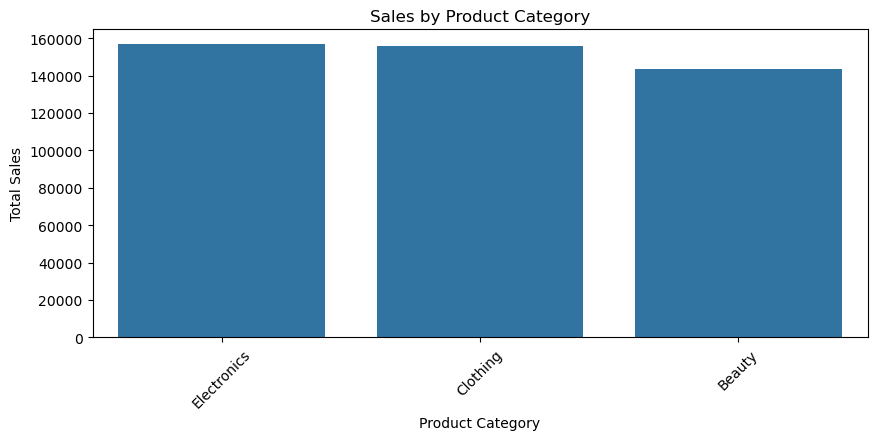

In [46]:
sales_by_category = sales_df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot Sales by Product Category
plt.figure(figsize=(10, 4))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64


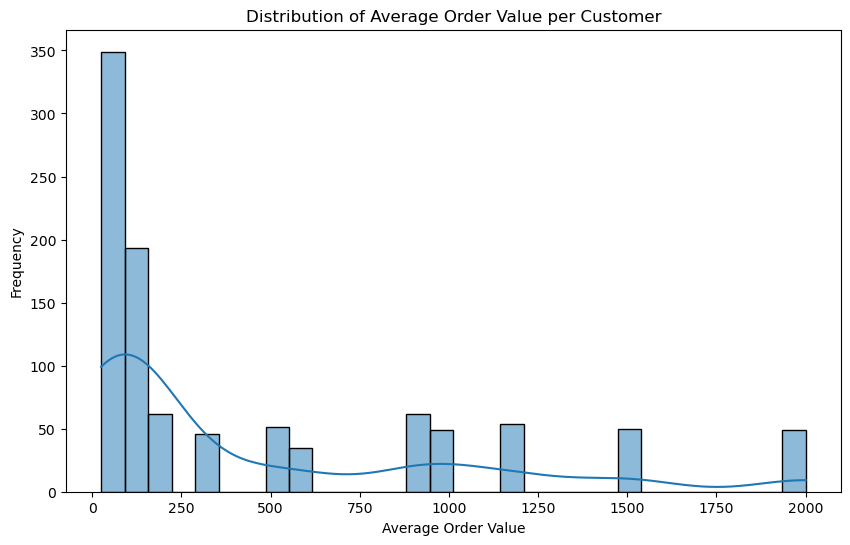

In [50]:
average_order_value = sales_df.groupby('Customer ID')['Total Amount'].mean()

# Describe average order value statistics
print(average_order_value.describe())

# Plot Average Order Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(average_order_value, kde=True, bins=30)
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()